In [27]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


from sklearn.preprocessing import MinMaxScaler

In [41]:
df = pd.read_csv(Path("../data/EMR.csv"))
df["Date"] = pd.DatetimeIndex(df["Date"]).date

df["Date"]=pd.to_datetime(df.Date,format="%Y-%m-%d")
# df.index=df['Date']

data=df.sort_index(ascending=True,axis=0)

# df.index = df["Date"]
# df = df.drop(axis=0, columns="Date")
data.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-25,$96,2076210,$95.76,$96.49,$95.47
1,2021-06-24,$95.35,2585059,$94.97,$95.42,$94.14
2,2021-06-23,$94.50,2234949,$95.11,$96.03,$94.45
3,2021-06-22,$94.78,2058333,$94.75,$95.52,$93.96
4,2021-06-21,$94.93,2580230,$93.22,$95.08,$93.01


In [74]:
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=["Date","Close/Last"])

for i in range(0,len(data)):
    new_dataset["Date"][i]=data["Date"][i]
    new_dataset["Close/Last"][i]=data["Close/Last"][i]

new_dataset = new_dataset.replace({"\$":""}, regex = True) 
new_dataset = new_dataset.astype({"Close/Last": float})
# new_dataset.set_index("Date", inplace=True)
new_dataset.index = df['Date']
new_dataset


,Date,Close/Last
Date,,
2021-06-25,2021-06-25,96.00
2021-06-24,2021-06-24,95.35
2021-06-23,2021-06-23,94.50
2021-06-22,2021-06-22,94.78
2021-06-21,2021-06-21,94.93
...,...,...
2011-07-01,2011-07-01,57.09
2011-06-30,2011-06-30,56.25
2011-06-29,2011-06-29,54.93


In [58]:
new_dataset.dtypes

Date          datetime64[ns]
Close/Last           float64
dtype: object

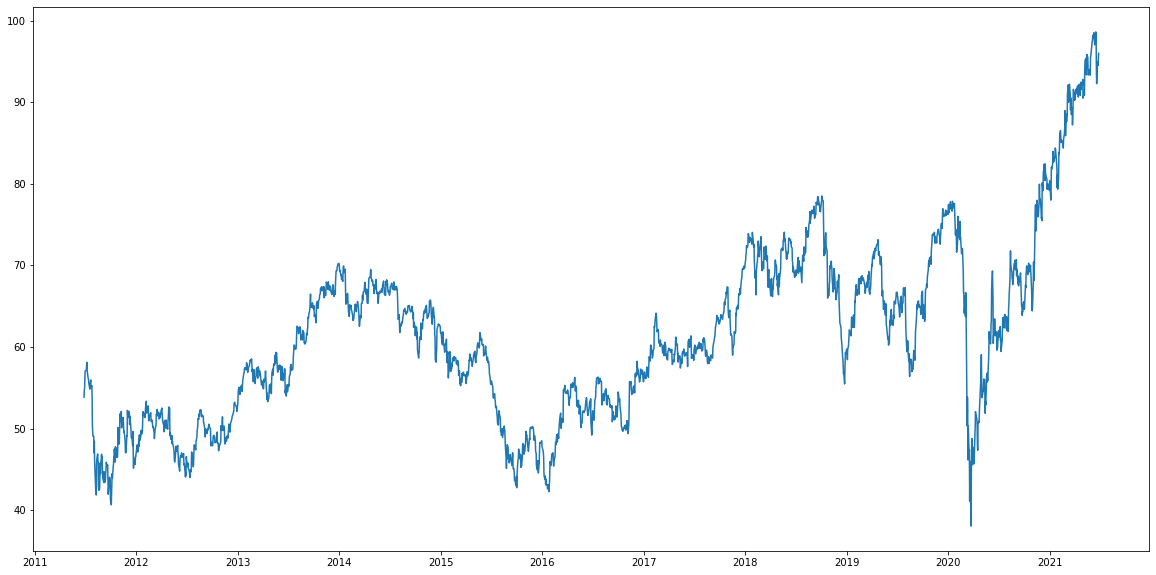

In [60]:
plt.plot(new_dataset["Close/Last"])

In [75]:
scaler=MinMaxScaler(feature_range=(0,1))

new_dataset.index=new_dataset.Date
new_dataset.drop("Date",axis=1,inplace=True)
final_data = new_dataset.values

train_data=final_data[0:200,:]
valid_data=final_data[200:,:]

scaler=MinMaxScaler(feature_range=(0,1))

scaled_data=scaler.fit_transform(final_data)
x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

In [77]:
lstm_model=Sequential()

lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(np.shape(x_train_data)[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

model_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
model_data=model_data.reshape(-1,1)
model_data=scaler.transform(model_data)

In [88]:
lstm_model.compile(loss="mean_squared_error",optimizer="adam")

x_train_data = np.asarray(x_train_data)
y_train_data = np.asarray(y_train_data)
# validation_x = np.asarray(validation_x)
# validation_y = np.asarray(validation_y)

lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)
X_test=[]
for i in range(60,model_data.shape[0]):
    X_test.append(model_data[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

ValueError: in user code:

    F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\training.py:830 train_function  *
        return step_function(self, iterator)
    F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\training.py:813 run_step  *
        outputs = model.train_step(data)
    F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\training.py:770 train_step  *
        y_pred = self(x, training=True)
    F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    F:\ProgramFiles\Anaconda\lib\site-packages\keras\engine\input_spec.py:212 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (1, 60)
